In [1]:
!which jupyter
!pip list | grep jupyter
!pip install requests

import os

import sys
print(sys.path)

# Get the repo's base directory
repo_path = os.path.abspath("..")  # Moves one level up from the notebooks directory
sys.path.append(repo_path)  # Adds the repo directory to Python's package lookup path
print(sys.path)  # ✅ Verify it's correctly included

!pip install -r "{repo_path}/requirements.txt"

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from util import MongoDBConnFacade  # ✅ Import your MongoDB connection facade

# ✅ Get MongoDB Instance
mongo = MongoDBConnFacade.MongoDBConnFacade.getInstance()

# ✅ Fetch historical trade prices (from Trade_Events)
real_prices_cursor = mongo.db["Trade_Events"].find({}, {"_id": 0, "to_currency_price": 1})
real_prices = [doc["to_currency_price"] for doc in real_prices_cursor]

# ✅ Fetch synthetic trade event prices (from Trade_Events_Aggregates)
synthetic_prices_cursor = mongo.db["Trade_Events_Aggregates"].find({}, {"_id": 0, "daily_high": 1})
synthetic_prices = [doc["daily_high"] for doc in synthetic_prices_cursor]

# ✅ Run Kolmogorov-Smirnov Test
ks_stat, p_value = stats.ks_2samp(synthetic_prices, real_prices)




/opt/anaconda3/bin/jupyter
jupyter                           1.0.0
jupyter_client                    8.6.0
jupyter-console                   6.6.3
jupyter_core                      5.7.2
jupyter-events                    0.10.0
jupyter-lsp                       2.2.0
jupyter_server                    2.14.1
jupyter_server_terminals          0.4.4
jupyterlab                        4.2.5
jupyterlab-pygments               0.1.2
jupyterlab_server                 2.27.3
jupyterlab-widgets                1.0.0
lckr_jupyterlab_variableinspector 3.1.0
['/Users/AK/ak/personal/my_github/jk_hithub/Oreilly_Books_HandsOn_GitRepos/Forex-Risk-Mgr-Applied-ML/notebooks', '/opt/anaconda3/lib/python312.zip', '/opt/anaconda3/lib/python3.12', '/opt/anaconda3/lib/python3.12/lib-dynload', '', '/opt/anaconda3/lib/python3.12/site-packages', '/opt/anaconda3/lib/python3.12/site-packages/aeosa', '/opt/anaconda3/lib/python3.12/site-packages/setuptools/_vendor']
['/Users/AK/ak/personal/my_github/jk_hithub/Oreilly_B

In [2]:
# ✅ Print KS-Test results
print(f"KS Statistic: {ks_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("⚠️ Warning: Synthetic data significantly differs from real trade data.")
else:
    print("✅ Synthetic data is statistically similar to real trade data.")


KS Statistic: 0.9988
P-Value: 0.0000
⚠️ Warning: Synthetic data significantly differs from real trade data.


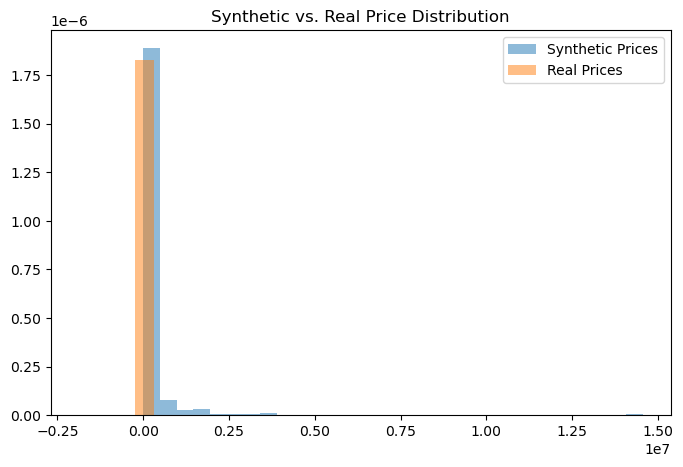

In [3]:
# ✅ Visualization (Optional)
plt.figure(figsize=(8, 5))
plt.hist(synthetic_prices, bins=30, alpha=0.5, label="Synthetic Prices", density=True)
plt.hist(real_prices, bins=30, alpha=0.5, label="Real Prices", density=True)
plt.legend()
plt.title("Synthetic vs. Real Price Distribution")
plt.show()


## Improving Synthetic Data Realism

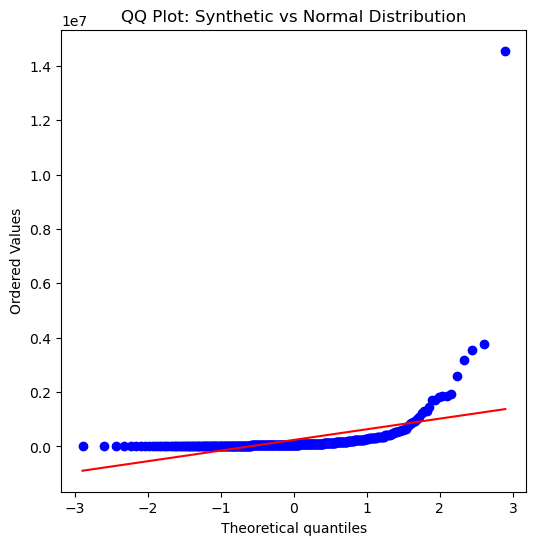

In [4]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

# Sort real and synthetic data
real_prices_sorted = np.sort(real_prices)
synthetic_prices_sorted = np.sort(synthetic_prices)

# Generate QQ Plot
plt.figure(figsize=(6, 6))
stats.probplot(synthetic_prices_sorted, dist="norm", plot=plt)
plt.title("QQ Plot: Synthetic vs Normal Distribution")
plt.show()
